## Fertilizer Recomendation using ML

In [167]:
# import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Necessay libraries to train the model
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Set seaborn style for better aesthetics
sns.set(style="whitegrid")

In [168]:
fertilizer = pd.read_csv("DataSet/Fertilizer Prediction.csv")
fertilizer

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea
...,...,...,...,...,...,...,...,...,...
94,25,50,32,Clayey,Pulses,24,0,19,28-28
95,30,60,27,Red,Tobacco,4,17,17,10-26-26
96,38,72,51,Loamy,Wheat,39,0,0,Urea
97,36,60,43,Sandy,Millets,15,0,41,DAP


In [169]:
# Top 5 rows of the dataset
fertilizer.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [170]:
# Bottom 5 rows of the dataset
fertilizer.tail()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
94,25,50,32,Clayey,Pulses,24,0,19,28-28
95,30,60,27,Red,Tobacco,4,17,17,10-26-26
96,38,72,51,Loamy,Wheat,39,0,0,Urea
97,36,60,43,Sandy,Millets,15,0,41,DAP
98,29,58,57,Black,Sugarcane,12,0,10,20-20


In [171]:
# Info about the dataset
fertilizer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


In [172]:
# statistical information about the dataset
fertilizer.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,18.909091,3.383838,18.606061
std,3.502304,5.840331,11.271568,11.599693,5.814667,13.476978
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,41.000000,13.000000,0.000000,19.000000
75%,33.000000,64.000000,50.500000,24.000000,7.500000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [173]:
# check the missing values in the dataset
fertilizer.isnull().sum()

Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

In [174]:
# check the duplicated values in the dataset
fertilizer.duplicated().sum()

0

In [175]:
# Only select the numerical columns
fertilizer_numeric = fertilizer.select_dtypes(include=[np.number])
corr = fertilizer_numeric.corr()
corr

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
Temparature,1.000000,0.973164,0.091222,-0.033771,-0.023424,0.207545
Humidity,0.973164,1.000000,0.091342,-0.060646,-0.003833,0.204044
Moisture,0.091222,0.091342,1.000000,-0.095945,0.027727,0.009276
Nitrogen,-0.033771,-0.060646,-0.095945,1.000000,-0.500087,-0.686971
Potassium,-0.023424,-0.003833,0.027727,-0.500087,1.000000,0.089192
Phosphorous,0.207545,0.204044,0.009276,-0.686971,0.089192,1.000000


In [176]:
# Total types of fertilizers in the dataset
fertilizer["Fertilizer Name"].value_counts()

Fertilizer Name
Urea        22
DAP         18
28-28       17
14-35-14    14
20-20       14
17-17-17     7
10-26-26     7
Name: count, dtype: int64

In [177]:
# Total number of unique values in the dataset
fertilizer.nunique()

Temparature        14
Humidity           13
Moisture           41
Soil Type           5
Crop Type          11
Nitrogen           24
Potassium          13
Phosphorous        32
Fertilizer Name     7
dtype: int64

# Visualization with various plotting

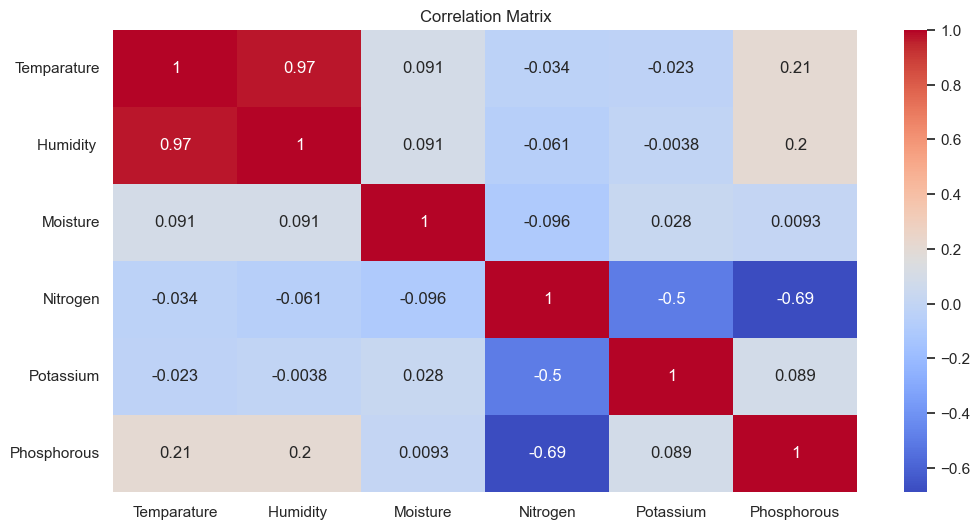

In [178]:
# Visualizing the correlation matrix with Heat Map
plt.figure(figsize=(12, 6))
sns.heatmap(corr, annot=True,cbar=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


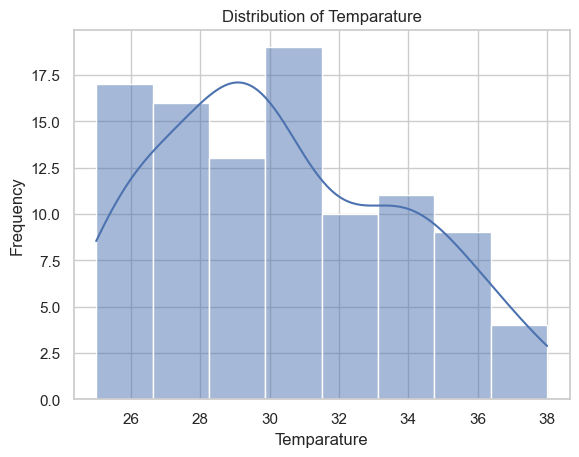

In [179]:
# Visualizing the distribution of the dataset with histogram
sns.histplot(fertilizer["Temparature"], kde=True)
plt.xlabel("Temparature")
plt.ylabel("Frequency")
plt.title("Distribution of Temparature")
plt.show()

In [180]:
# Only select the numerical columns
features = fertilizer.select_dtypes(include=[np.number]).columns.tolist()
print(features)

['Temparature', 'Humidity ', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorous']


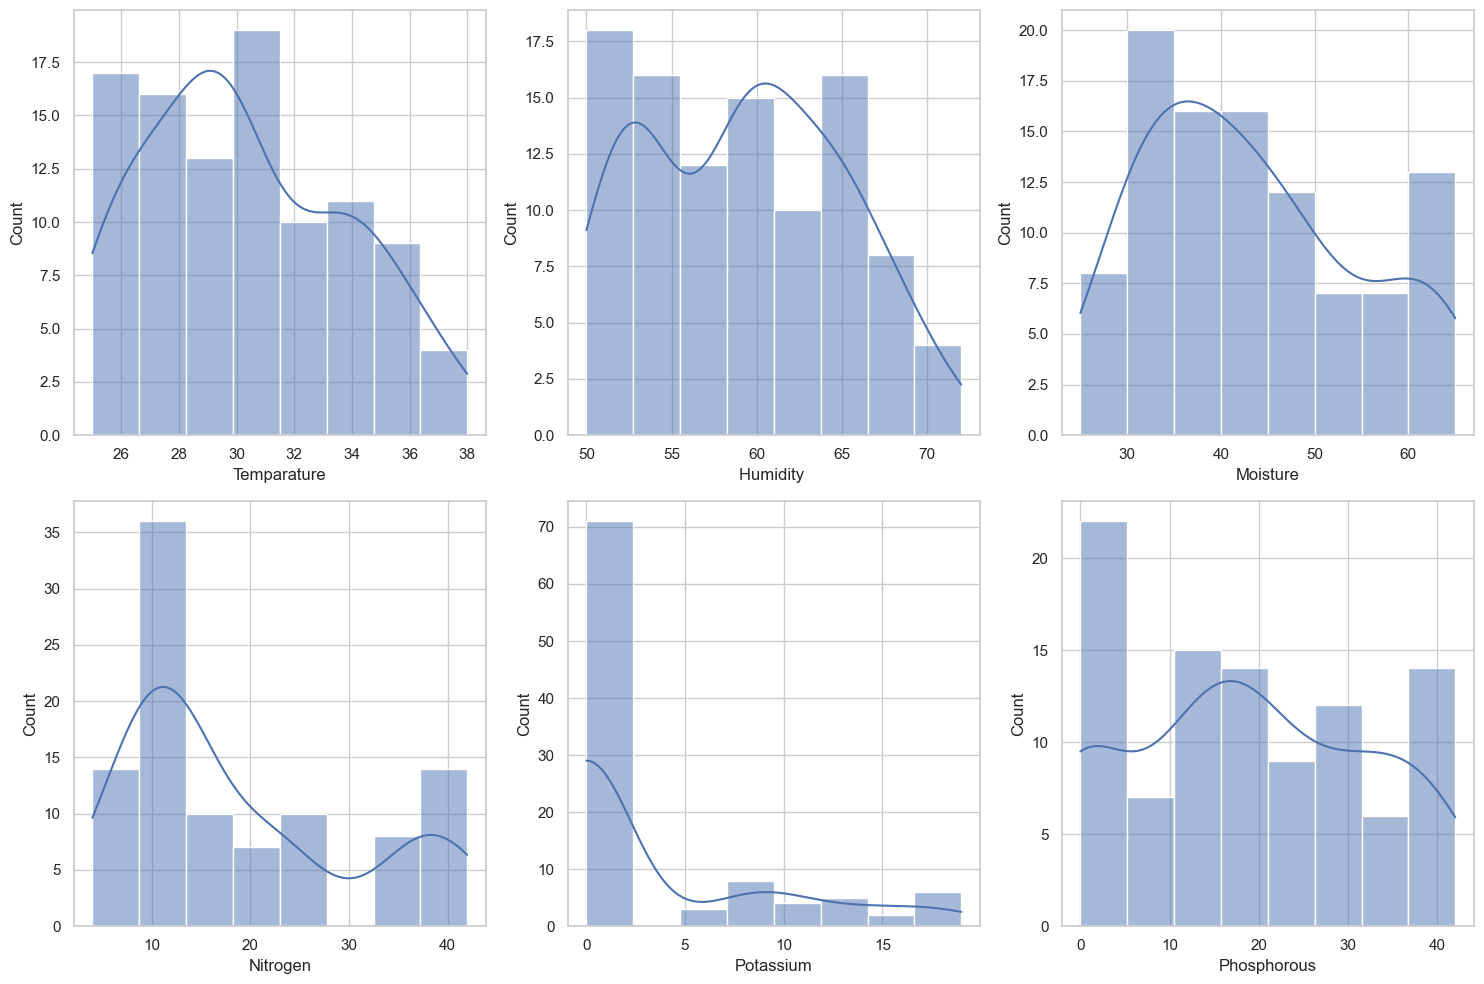

In [181]:
# visualize the distribution of each feature
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
for i, subplot in zip(features, ax.flatten()):
    sns.histplot(fertilizer[i], ax=subplot, kde=True)
    subplot.set_xlabel(i)
    subplot.set_ylabel('Count')
    # subplot.set_title(i)
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

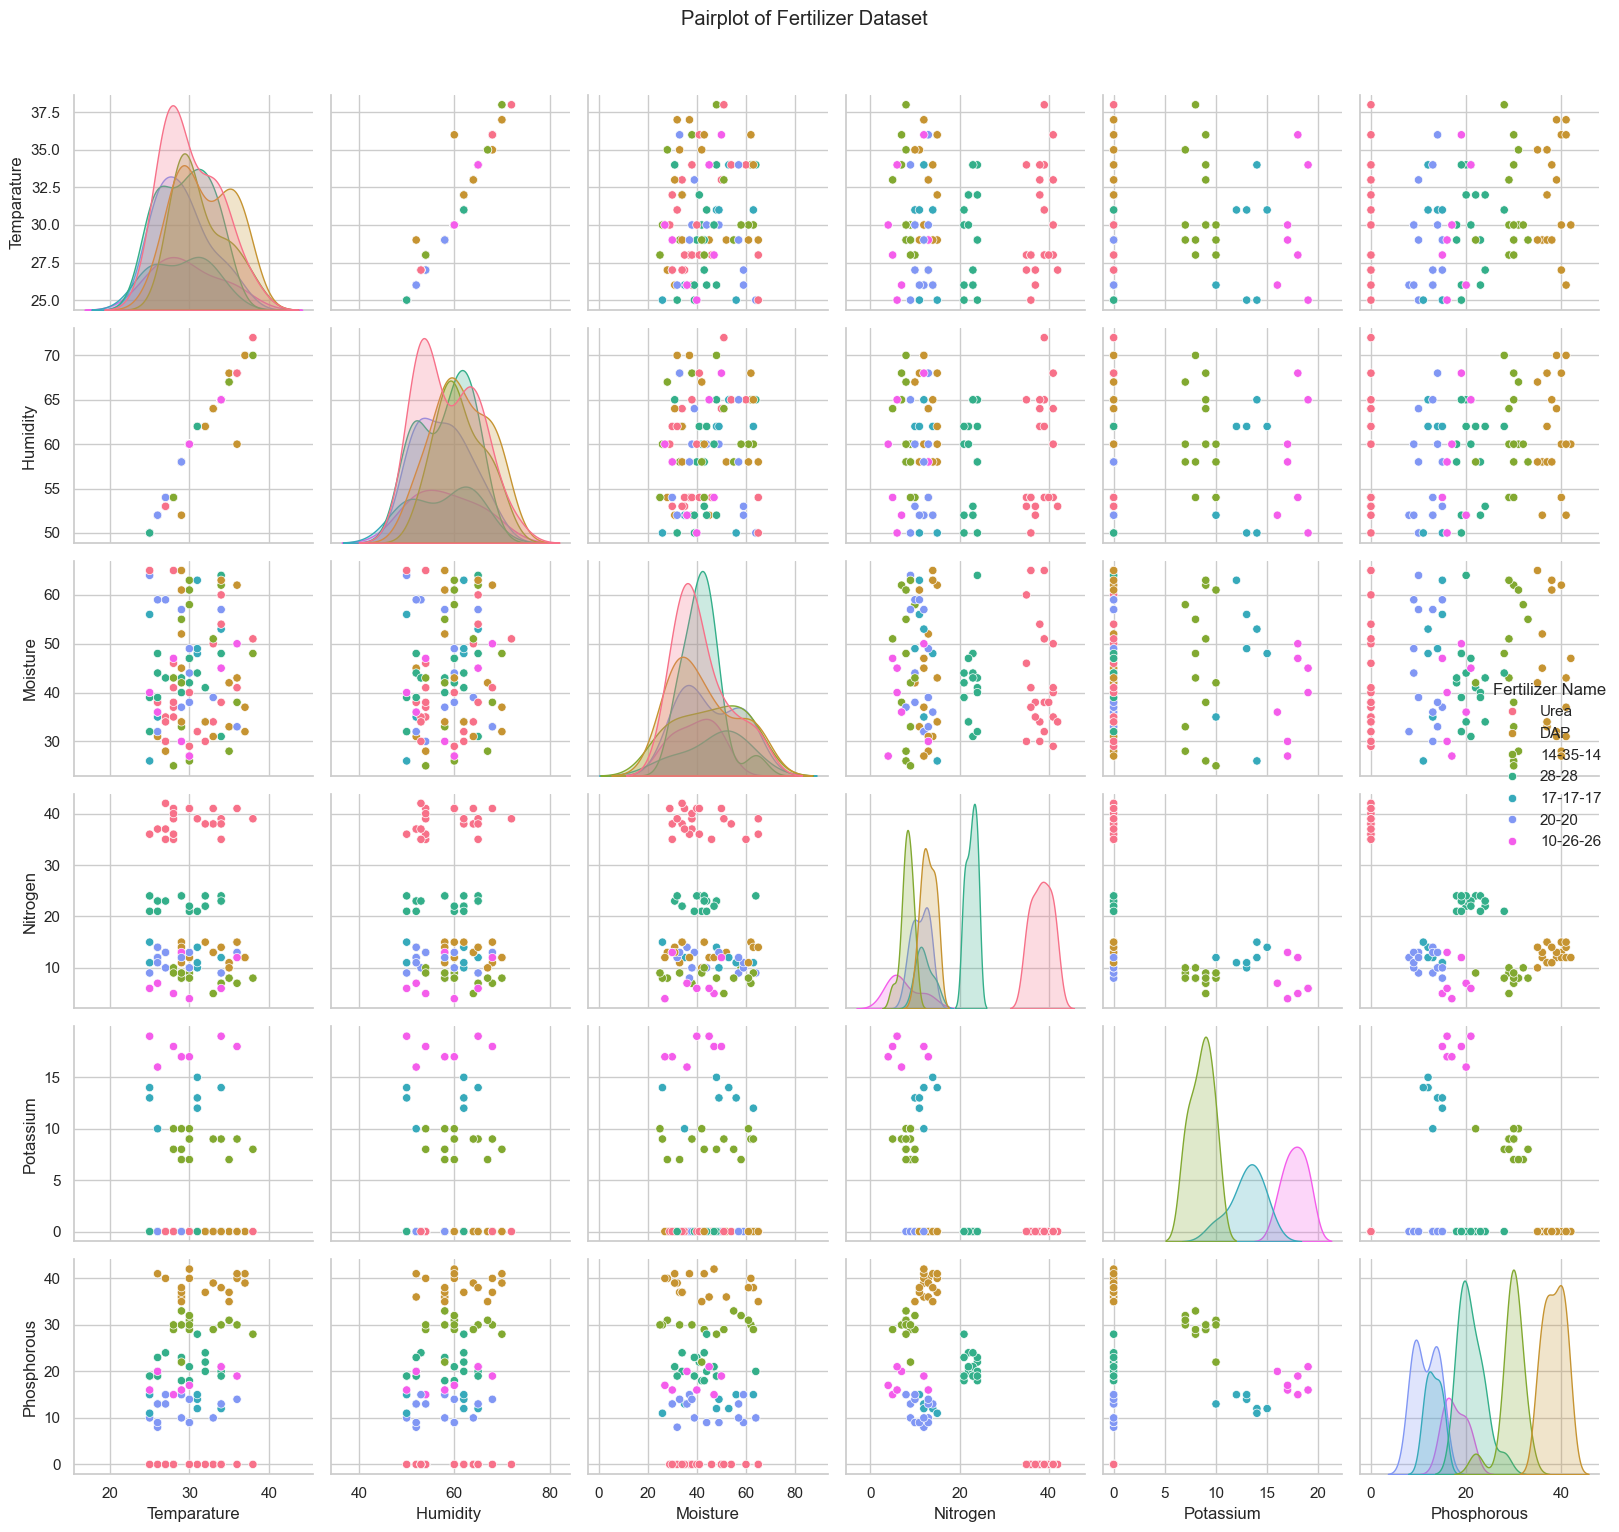

In [182]:
# Pair plot of the dataset
plt.figure(figsize=(12, 8))
sns.pairplot(fertilizer, hue="Fertilizer Name", palette="husl")
plt.suptitle("Pairplot of Fertilizer Dataset", y=1.02)
plt.tight_layout()
plt.show()


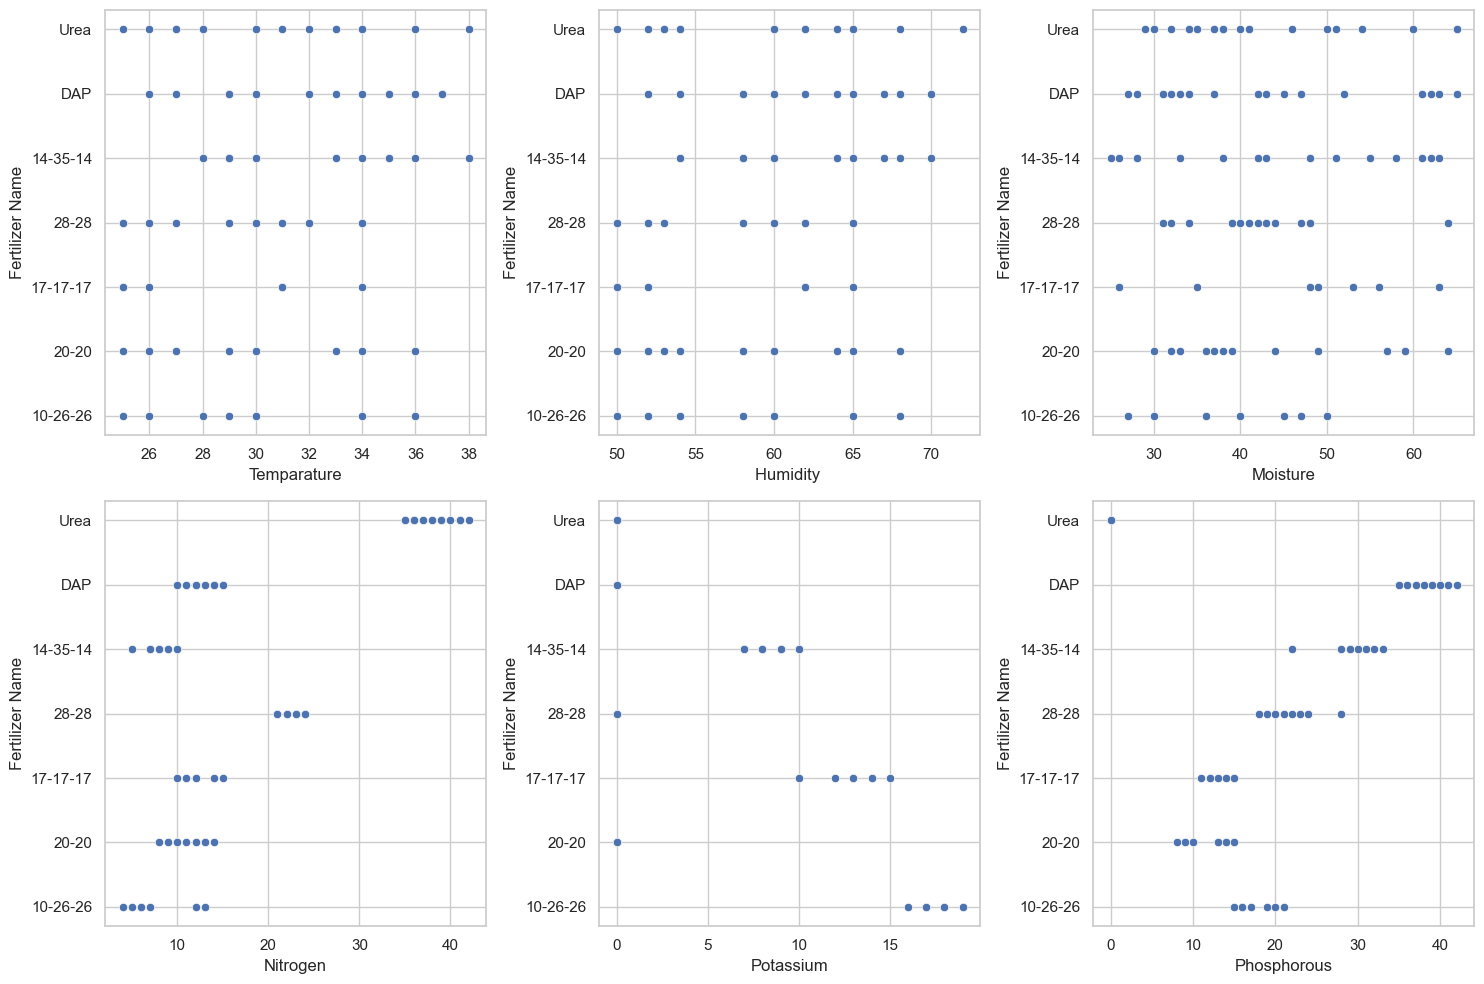

In [183]:
# Scatter plot of the dataset
fig , ax= plt.subplots(2, 3, figsize=(15, 10))
for i,subplot in zip(features, ax.flatten()):
    sns.scatterplot(x=fertilizer[i], y=fertilizer["Fertilizer Name"], ax=subplot)
    subplot.set_xlabel(i)
    subplot.set_ylabel("Fertilizer Name")
plt.tight_layout()
plt.show()

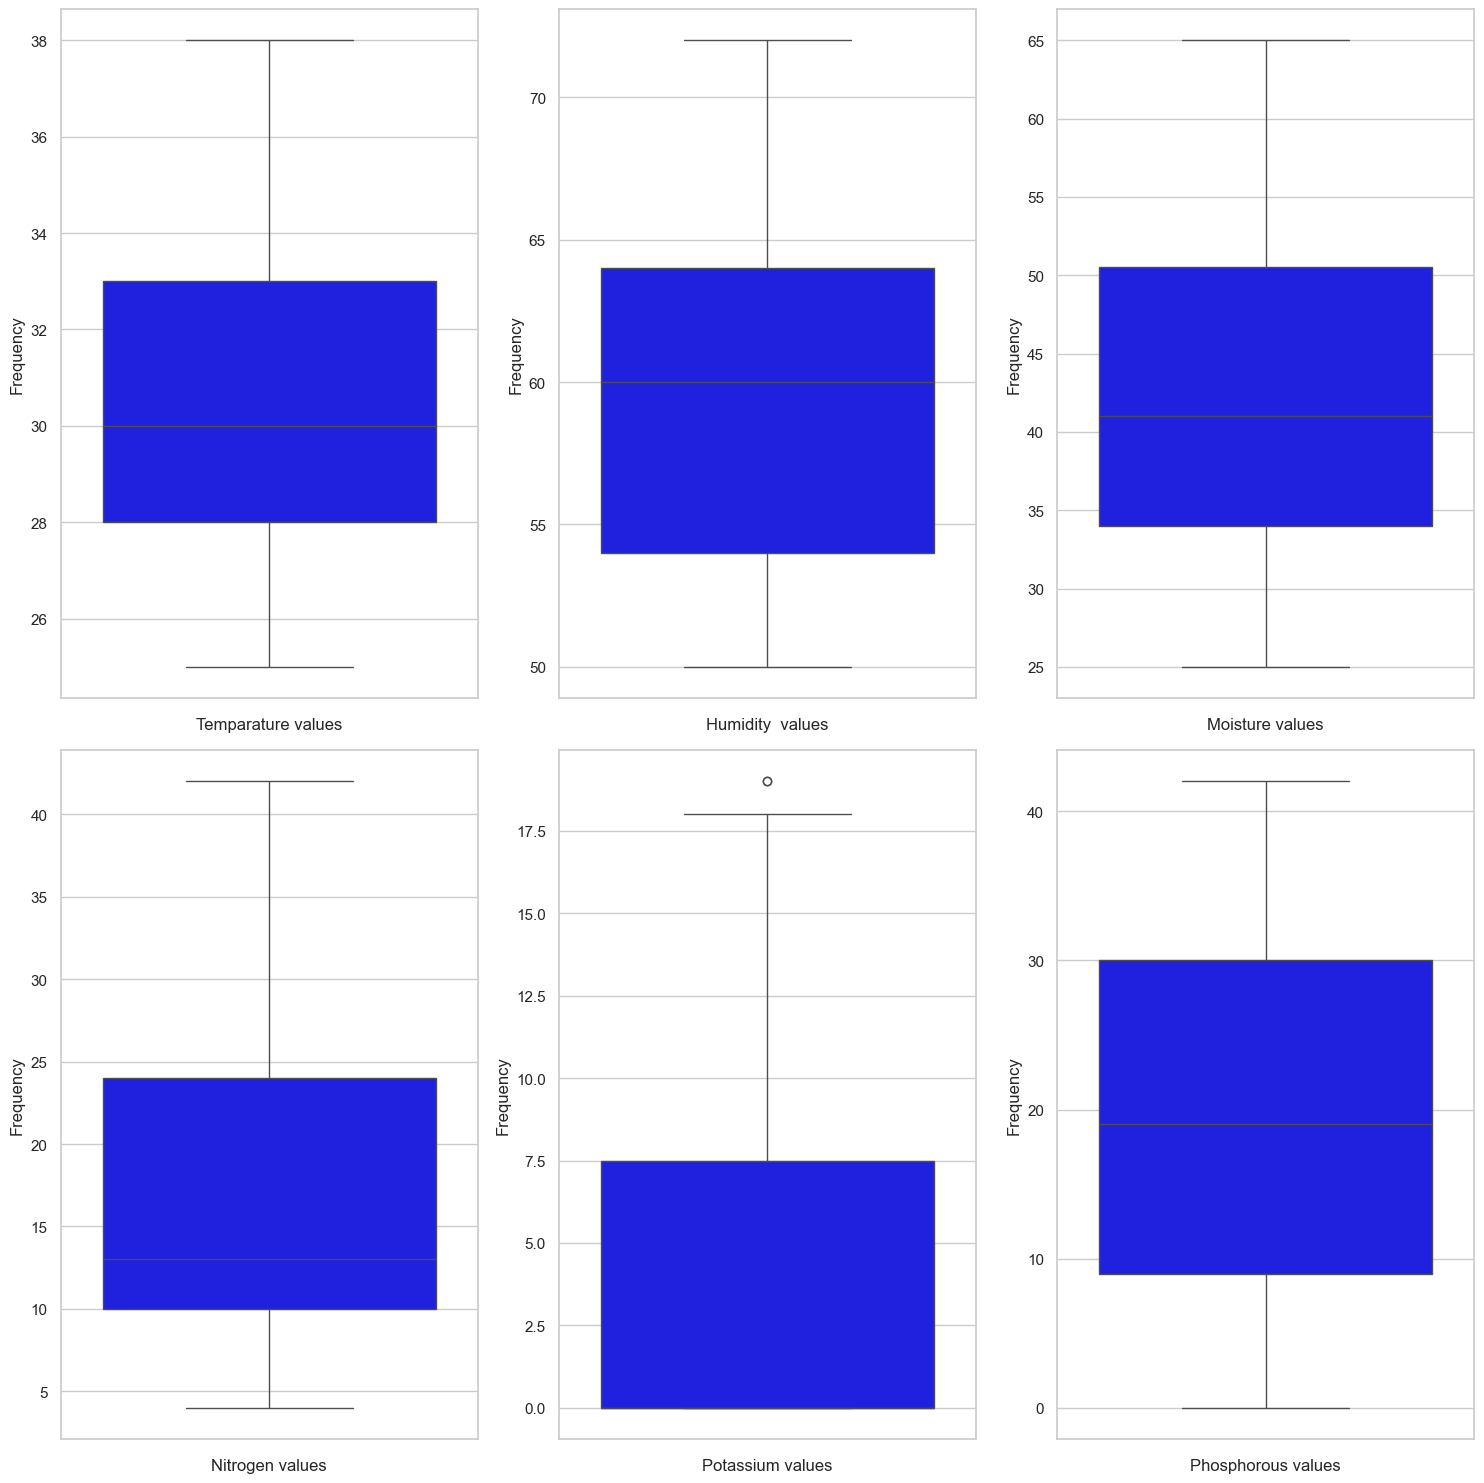

In [206]:
# Finding outliers - boxplot
fig, ax = plt.subplots(2, 3, figsize=(15, 15))
# Plot a boxplot for each feature
for i, subplot in zip(features, ax.flatten()):
    sns.boxplot(fertilizer[i], ax=subplot, color="blue")
    subplot.set_xlabel(f"{i} values")
    subplot.set_ylabel("Frequency")
plt.tight_layout()
plt.show()

# Encoding

In [184]:
fert_dict = {
    "Urea": 1,
    "DAP": 2,
    "14-35-14": 3,
    "28-28": 4,
    "17-17-17": 5,
    "20-20": 6,
    "10-26-26": 7,
}

In [185]:
# adding a new column to the dataset with the encoded values ["ferti_no"]
fertilizer["fert_no"] = fertilizer["Fertilizer Name"].map(fert_dict)

In [186]:
fertilizer.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name,fert_no
0,26,52,38,Sandy,Maize,37,0,0,Urea,1
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP,2
2,34,65,62,Black,Cotton,7,9,30,14-35-14,3
3,32,62,34,Red,Tobacco,22,0,20,28-28,4
4,28,54,46,Clayey,Paddy,35,0,0,Urea,1


In [187]:
# count of each fertilizer with encoded values
fertilizer["fert_no"].value_counts()

fert_no
1    22
2    18
4    17
3    14
6    14
5     7
7     7
Name: count, dtype: int64

In [188]:
# drop the target column with name and keep the target column with numbers
fertilizer.drop("Fertilizer Name", axis=1, inplace=True)
fertilizer.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,fert_no
0,26,52,38,Sandy,Maize,37,0,0,1
1,29,52,45,Loamy,Sugarcane,12,0,36,2
2,34,65,62,Black,Cotton,7,9,30,3
3,32,62,34,Red,Tobacco,22,0,20,4
4,28,54,46,Clayey,Paddy,35,0,0,1


In [189]:
fertilizer.select_dtypes(include=["object"]).columns

Index(['Soil Type', 'Crop Type'], dtype='object')

# Label Enorder

In [190]:
lb=LabelEncoder()
fertilizer["Soil Type"]=lb.fit_transform(fertilizer["Soil Type"])
fertilizer["Crop Type"]=lb.fit_transform(fertilizer["Crop Type"])

In [191]:
fertilizer.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,fert_no
0,26,52,38,4,3,37,0,0,1
1,29,52,45,2,8,12,0,36,2
2,34,65,62,0,1,7,9,30,3
3,32,62,34,3,9,22,0,20,4
4,28,54,46,1,6,35,0,0,1


In [192]:
# Spliting the dataset into features and target
x=fertilizer.drop("fert_no",axis=1)
y=fertilizer["fert_no"]

In [193]:
print("The shape of features is: ", x.shape)
print("The shape of target is: ", y.shape)

The shape of features is:  (99, 8)
The shape of target is:  (99,)


In [194]:
# split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

# print the shape of training and testing sets
print(f"The shape of x_train is: {x_train.shape}")
print(f"The shape of x_test is: {x_test.shape}")
print(f"The shape of y_train is: {y_train.shape}")
print(f"The shape of y_test is: {y_test.shape}")

The shape of x_train is: (79, 8)
The shape of x_test is: (20, 8)
The shape of y_train is: (79,)
The shape of y_test is: (20,)


In [195]:
# Standardize the dataset
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [196]:
# Training the Model
model = DecisionTreeClassifier()
model.fit(x_train_scaled, y_train)

DecisionTreeClassifier()

In [197]:
# Accuracy of the Test Set
accuracy = model.score(x_test, y_test)
print(f"The accuracy of the model is: {accuracy*100:.2f}%")

The accuracy of the model is: 30.00%


In [198]:
# Accuracy of the Training Set
accuracy = model.score(x_train, y_train)
print(f"The accuracy of the model is: {accuracy*100:.2f}%")

The accuracy of the model is: 20.25%


# Prediction by the model

In [218]:
def recommend_fertilizer(
    Temparature,
    Humidity,
    Moisture,
    Soil_Type,
    Crop_Type,
    Nitrogen,
    Potassium,
    Phosphorous,
):
    features = np.array(
        [
            [
                Temparature,
                Humidity,
                Moisture,
                Soil_Type,
                Crop_Type,
                Nitrogen,
                Potassium,
                Phosphorous,
            ]
        ]
    )
    transformed_features = scaler.transform(features)
    prediction = model.predict(transformed_features).reshape(1, -1)
    fert_dict = {
        1: "Urea",
        2: "DAP",
        3: "14-35-14",
        4: "28-28",
        5: "17-17-17",
        6: "20-20",
        7: "10-26-26",
    }
    fertilizer = [fert_dict[i] for i in prediction[0]]

    return f"{fertilizer} is the best fertilizer for the given conditions"

In [219]:
# Given input values
Temparature = 26
Humidity = 0.5
Moisture = 0.6
Soil_Type = 2
Crop_Type = 3
Nitrogen = 10
Potassium = 15
Phosphorous = 6

# Use the recommendation function to get a prediction
print(
    recommend_fertilizer(
        Temparature, Humidity, Moisture, Soil_Type, Crop_Type, Nitrogen, Potassium, Phosphorous
    )
)

# Another sample input values
Temparature_sample = 30
Humidity_sample = 0.2
Moisture_sample = 0.4
Soil_Type_sample = 1
Crop_Type_sample = 7
Nitrogen_sample = 12
Potassium_sample = 18
Phosphorous_sample = 8

# Use the recommendation function to get a prediction for the sample input
print(
    recommend_fertilizer(
        Temparature_sample,
        Humidity_sample,
        Moisture_sample,
        Soil_Type_sample,
        Crop_Type_sample,
        Nitrogen_sample,
        Potassium_sample,
        Phosphorous_sample,
    )
)

['17-17-17'] is the best fertilizer for the given conditions
['10-26-26'] is the best fertilizer for the given conditions


### User input for Fertilizer Recommendation


In [ ]:
'''def recommend_fertilizer():
    Temperature = float(input("Enter Temperature: "))
    Humidity = float(input("Enter Humidity: "))
    Moisture = float(input("Enter Moisture: "))
    Soil_Type = int(input("Enter Soil Type (as a numerical value): "))
    Crop_Type = int(input("Enter Crop Type (as a numerical value): "))
    Nitrogen = float(input("Enter Nitrogen content: "))
    Potassium = float(input("Enter Potassium content: "))
    Phosphorous = float(input("Enter Phosphorous content: "))

    features = np.array(
        [
            [
                Temperature,
                Humidity,
                Moisture,
                Soil_Type,
                Crop_Type,
                Nitrogen,
                Potassium,
                Phosphorous,
            ]
        ]
    )
    transformed_features = scaler.transform(features)
    prediction = model.predict(transformed_features).reshape(1, -1)
    fert_dict = {
        1: "Urea",
        2: "DAP",
        3: "14-35-14",
        4: "28-28",
        5: "17-17-17",
        6: "20-20",
        7: "10-26-26",
    }
    fertilizer = [fert_dict[i] for i in prediction[0]]

    return f"{fertilizer} is the best fertilizer for the given conditions"


recommend_fertilizer()'''